# Try to use DPP construct polynomial and reconstruct DPP

$$
K(x,y) = \frac{1}{\pi} \sqrt{\frac{\partial^2 }{\partial x \partial y}\log\boldsymbol{E}(f(x)f(y))}.
$$


In [213]:
using LinearAlgebra, Distributions, StatsBase, Plots, Polynomials

In [214]:
n = 2
try_GUE = []
for i = 1:100000
    A = randn(n,n) + im*randn(n,n)
    append!(try_GUE, eigvals(Hermitian((A+A')/2)))
end

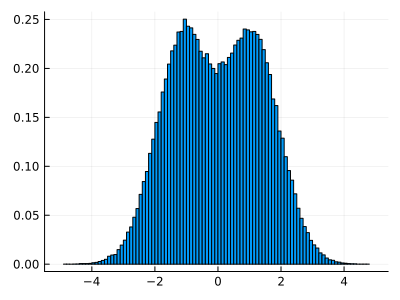

In [215]:
histogram(try_GUE, size = (400,300) ,normalize=:pdf, label=false)

In [216]:
savefig("../figures/test-49.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-49.pdf"

grids from -6 to 6

In [217]:
ogrids = -6:0.02:6
grids = ogrids[2:end-1]

-5.98:0.02:5.98

In [218]:
function partialx(M)
    return (M[3:end, 2:end-1] - M[1:end-2, 2:end-1])/2/(ogrids[2] - ogrids[1]) ./ M[2:end-1, 2:end-1]
end
function partialy(M)
    return (M[2:end-1, 3:end] - M[2:end-1, 1:end-2])/2/(ogrids[2] - ogrids[1]) ./ M[2:end-1, 2:end-1]
end
function partialxy(M)
    return (M[3:end, 3:end] + M[1:end-2, 1:end-2] - M[1:end-2, 3:end] - M[3:end, 1:end-2]) /4 /(ogrids[2] - ogrids[1])^2 ./ M[2:end-1, 2:end-1]
end

partialxy (generic function with 1 method)

In [219]:
copy_num = 2000
Eff = zeros(length(ogrids), length(ogrids))
Ef = zeros(length(ogrids))
for i = 1:copy_num
    A = randn(n,n) + im*randn(n,n)
    get_p = fromroots(eigvals(Hermitian((A+A')/2)))
    f = get_p.(ogrids)
    Ef = (Ef*(i-1) + f) / i
    ff = f .* (f)'
    Eff = (Eff*(i-1) + ff) / i
end

In [220]:
#Eff = Eff - Ef .* Ef' # with this or without

In [221]:
logEff = log.((Complex.(Eff)))
logEff = Hermitian(logEff)
K = .√((logEff[3:end, 3:end] + logEff[1:end-2, 1:end-2] - logEff[1:end-2, 3:end] - logEff[3:end, 1:end-2]) /4 /(ogrids[2] - ogrids[1])^2) *
   (grids[2] - grids[1]) / π # correct normalization
#K = .√(partialxy(Eff) .- partialx(Eff) .* partialy(Eff)) / π * (grids[2] - grids[1])

599×599 Matrix{ComplexF64}:
 0.000272228+0.0im  0.000273216+0.0im  …  0.000270859+0.0im
 0.000273216+0.0im  0.000274206+0.0im     0.000271852+0.0im
  0.00027421+0.0im  0.000275204+0.0im     0.000272853+0.0im
 0.000275212+0.0im   0.00027621+0.0im     0.000273861+0.0im
 0.000276222+0.0im  0.000277223+0.0im     0.000274877+0.0im
 0.000277239+0.0im  0.000278244+0.0im  …  0.000275901+0.0im
 0.000278264+0.0im  0.000279273+0.0im     0.000276933+0.0im
 0.000279297+0.0im  0.000280309+0.0im     0.000277973+0.0im
 0.000280337+0.0im  0.000281353+0.0im     0.000279021+0.0im
 0.000281386+0.0im  0.000282406+0.0im     0.000280078+0.0im
            ⋮                          ⋱  
 0.000278993+0.0im  0.000280016+0.0im  …  0.000278767+0.0im
 0.000277948+0.0im  0.000278967+0.0im     0.000277734+0.0im
 0.000276912+0.0im  0.000277927+0.0im     0.000276709+0.0im
 0.000275884+0.0im  0.000276895+0.0im     0.000275692+0.0im
 0.000274863+0.0im  0.000275871+0.0im     0.000274682+0.0im
 0.000273851+0.0im  0.0002748

In [222]:
Λ, Q = eigen(K)
tr(K)

1.515514965774312 + 0.0im

In [223]:
#0.8955044955055671, 1
#1.5283230507288368, 2
#2.1102178359823873, 3
#2.7213506349113645, 4
#3.2389773015114853, 5
#3.7749715242911313, 6
#4.382451985280821, 7
#4.966556137020364, 8

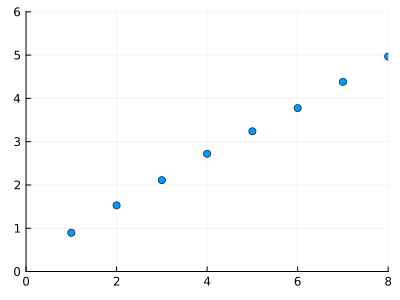

In [229]:
scatter([i for i in 1:8], [.8955044955055671,1.5283230507288,2.11021783,2.7213506,3.238977301,3.77497152,4.38245198,4.96655613],
    xlims = (0.0,8.0),
    ylims = (0, 6.0),
    label = false,
    size = (400,300))

In [230]:
savefig("../figures/test-411.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-411.pdf"

In [225]:
[.8955044955055671,1.5283230507288,2.11021783,2.7213506,3.238977301,3.77497152,4.38245198,4.96655613] ./[i for i in 1:8]

8-element Vector{Float64}:
 0.8955044955055671
 0.7641615253644
 0.7034059433333333
 0.68033765
 0.6477954602
 0.6291619199999999
 0.6260645685714286
 0.62081951625

In [226]:
Λ

599-element Vector{ComplexF64}:
  -2.239980661007903 - 0.3030596381027912im
 -2.2189585983170694 - 0.2674207671958337im
  -1.818634062638336 - 0.5152056849036932im
 -1.6299768064079077 - 0.20393778213304264im
 -1.5985119501588585 - 0.3365633782235472im
 -1.5555298772134292 - 0.6492978278397837im
 -1.4602771839220456 - 0.3878578453042762im
 -1.3626010598694263 - 0.5663373397858872im
 -1.3286499048880778 + 0.10467106331525675im
 -1.2085356642077434 - 0.4136687909621856im
                     ⋮
   1.318727594520682 - 0.12222286853290049im
  1.3964287577214272 - 0.08318635620219396im
   1.465395600346449 + 0.6990901723001355im
  1.6836020237233646 + 0.7507676206435241im
  2.0072940502085967 + 0.7427033884534294im
   2.269124905984994 + 0.8163424354511402im
  2.9169156102941756 + 0.6740867864456924im
   3.191486218694531 + 0.93447774866541im
   5.875203396806447 + 0.7534210375940247im

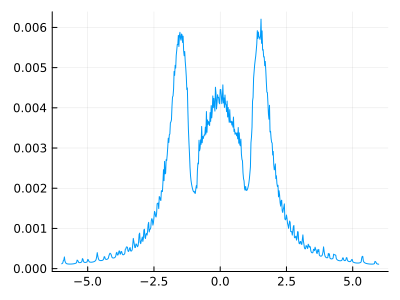

In [227]:
plot(grids, abs.(Q[:,end]).^2, label = false, size = (400,300))

In [228]:
savefig("../figures/test-410.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-410.pdf"